In [232]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.neural_network import *
from sklearn.metrics import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

sns.set_style('white')


In [233]:
def getxy(query=None):
    exceptCol = [
        '地理区域',
        '平均货物吞吐量',
        '人均GDP',
        '物流总成本占GDP的平均比例',
    ]

    df = pd.read_excel(r'../数据预处理/xlsx/双体-合并修正缩放后总数据.xlsx', sheet_name='已编码汇总')
    df.drop(columns=exceptCol, inplace=True, axis=1)
    if query is not None:
        df = df[query(df)]
        df.reset_index(inplace=True)
    X = df
    y = df.pop('售价')
    return X, y

----------ridge----------
X['GDP'].mean() 586.8428100987925


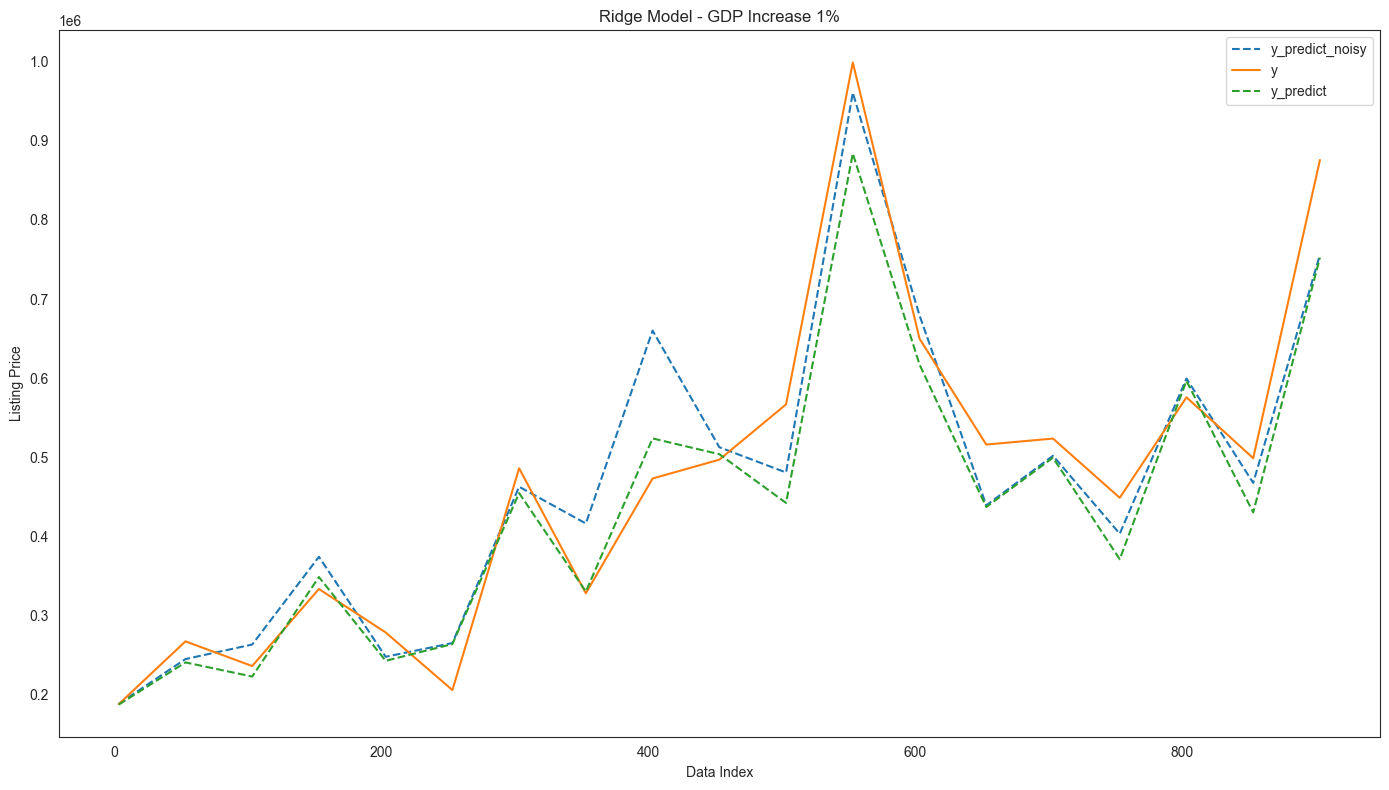

双体-Ridge Model - GDP Increase 1%.svg
平均价格变化: 30227.811425498105
平均价格变化率: 6.875323893128995
----------ridge----------
X['GDP'].mean() 586.8428100987925


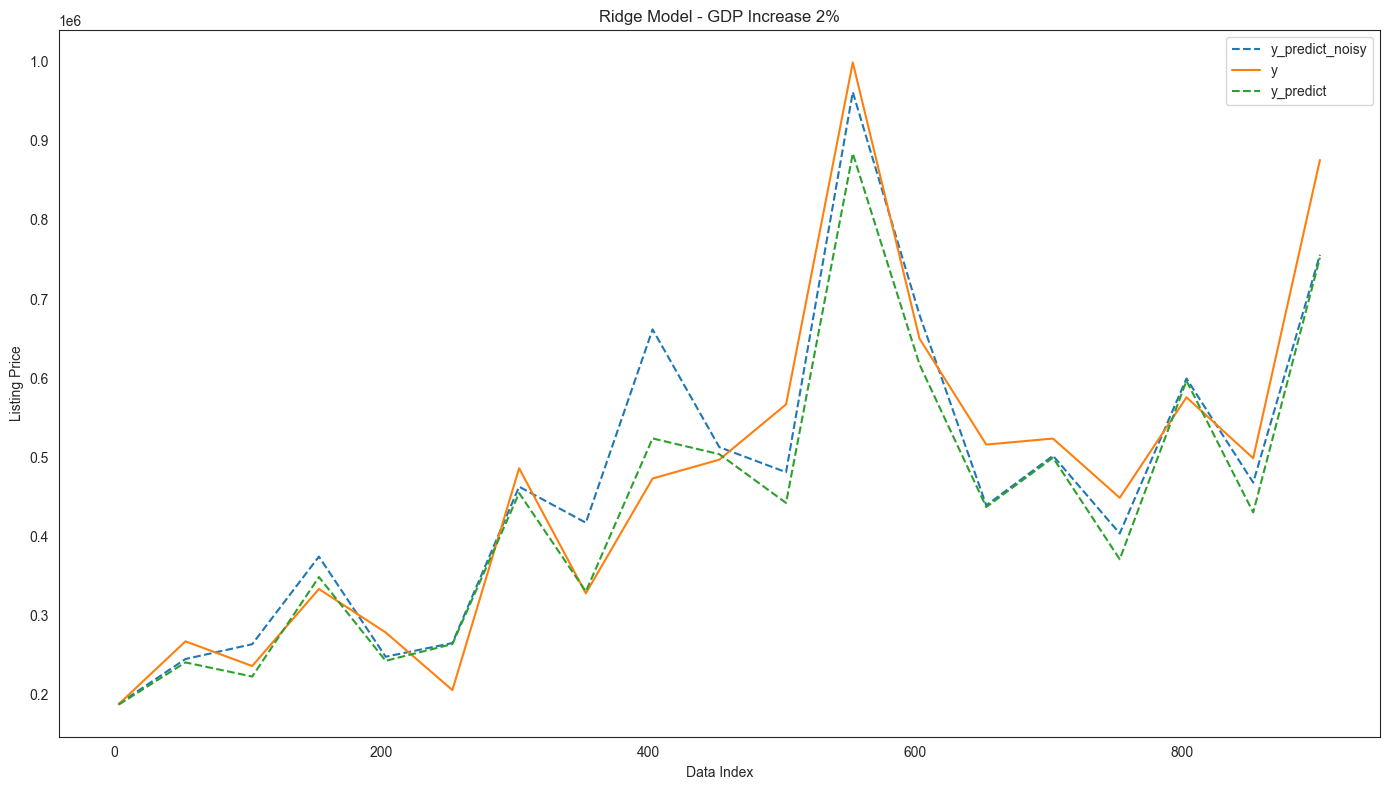

双体-Ridge Model - GDP Increase 2%.svg
平均价格变化: 30549.27902847051
平均价格变化率: 6.948441786464755
----------ridge----------
X['GDP'].mean() 586.8428100987925


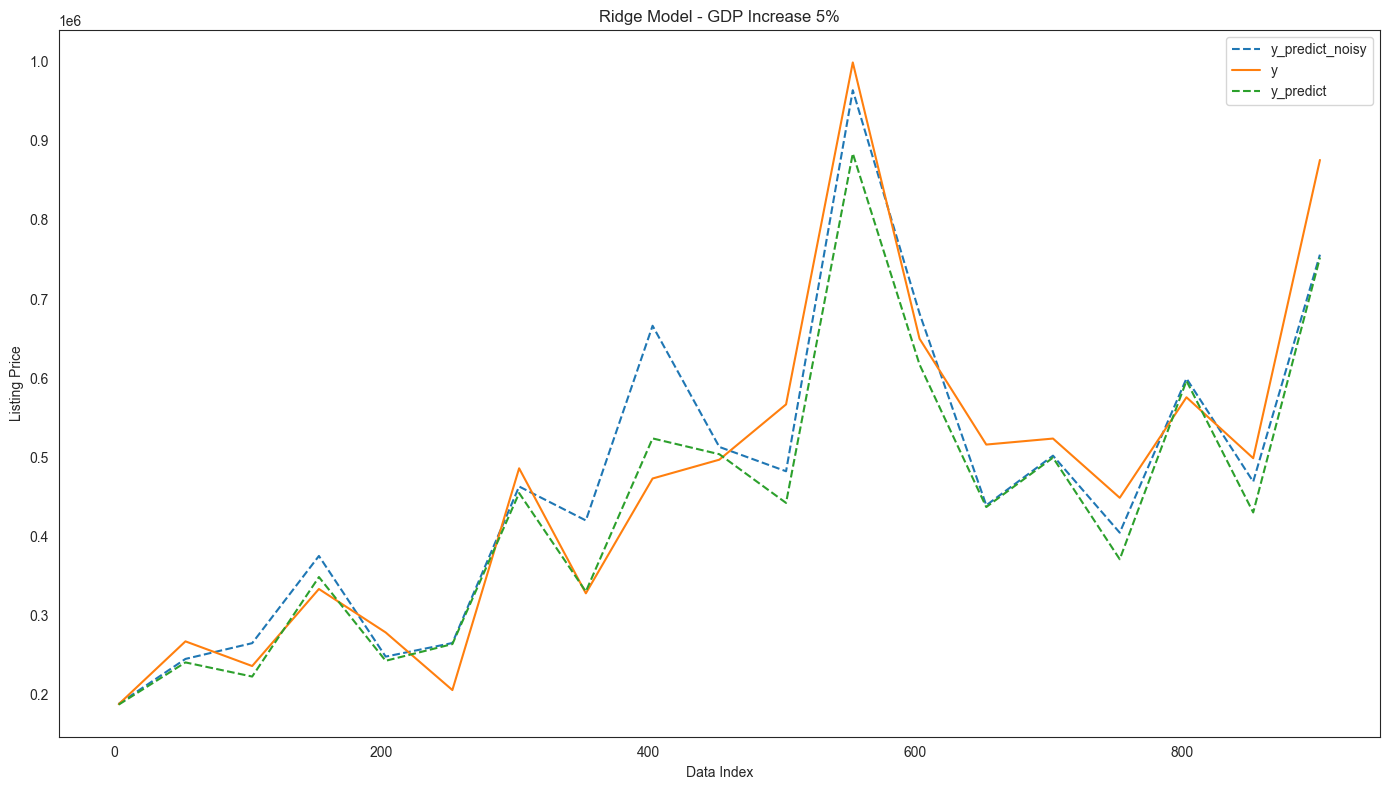

双体-Ridge Model - GDP Increase 5%.svg
平均价格变化: 31516.4610122944
平均价格变化率: 7.1684275905570445
----------ridge----------
X['GDP'].mean() 586.8428100987925


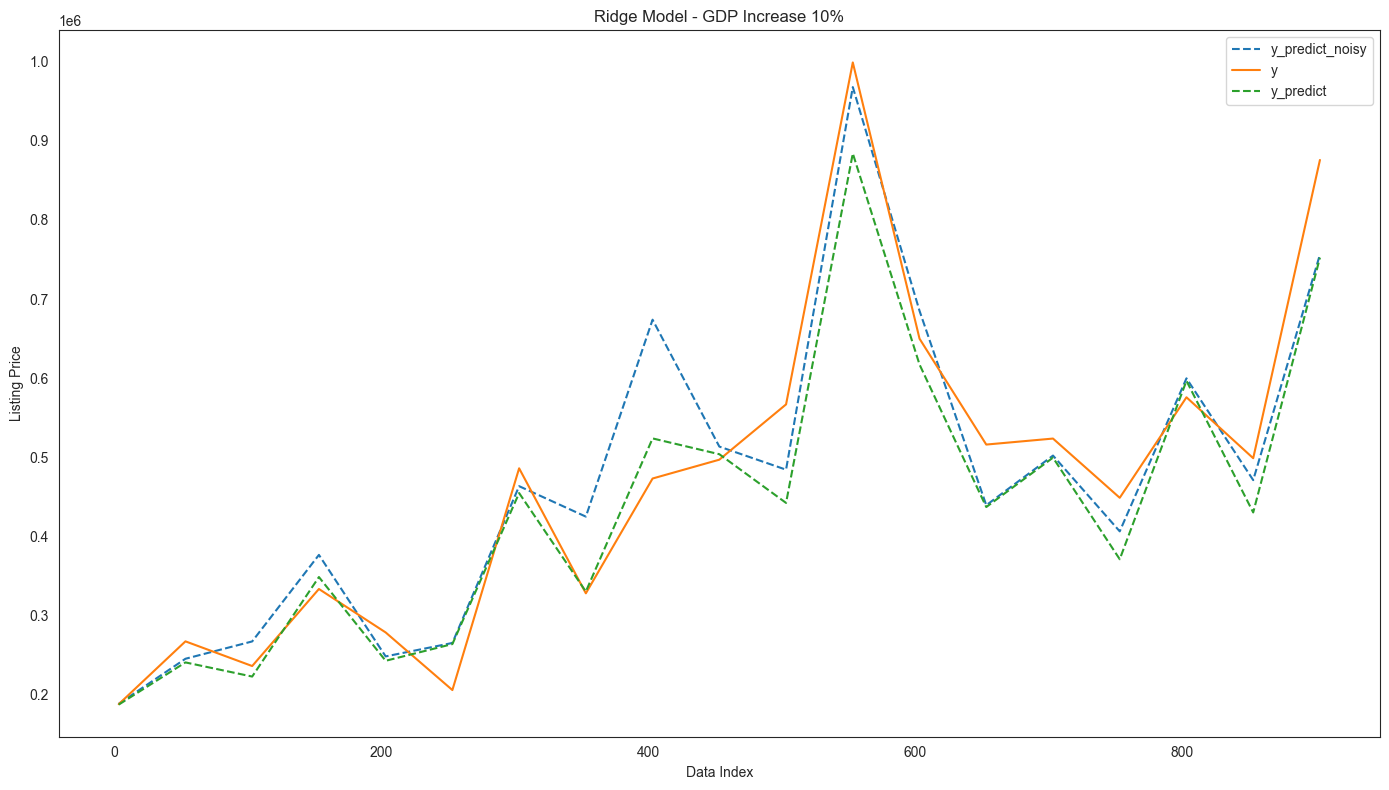

双体-Ridge Model - GDP Increase 10%.svg
平均价格变化: 33137.74610370101
平均价格变化率: 7.537189323572189
----------catBoost----------
X['GDP'].mean() 586.8428100987925


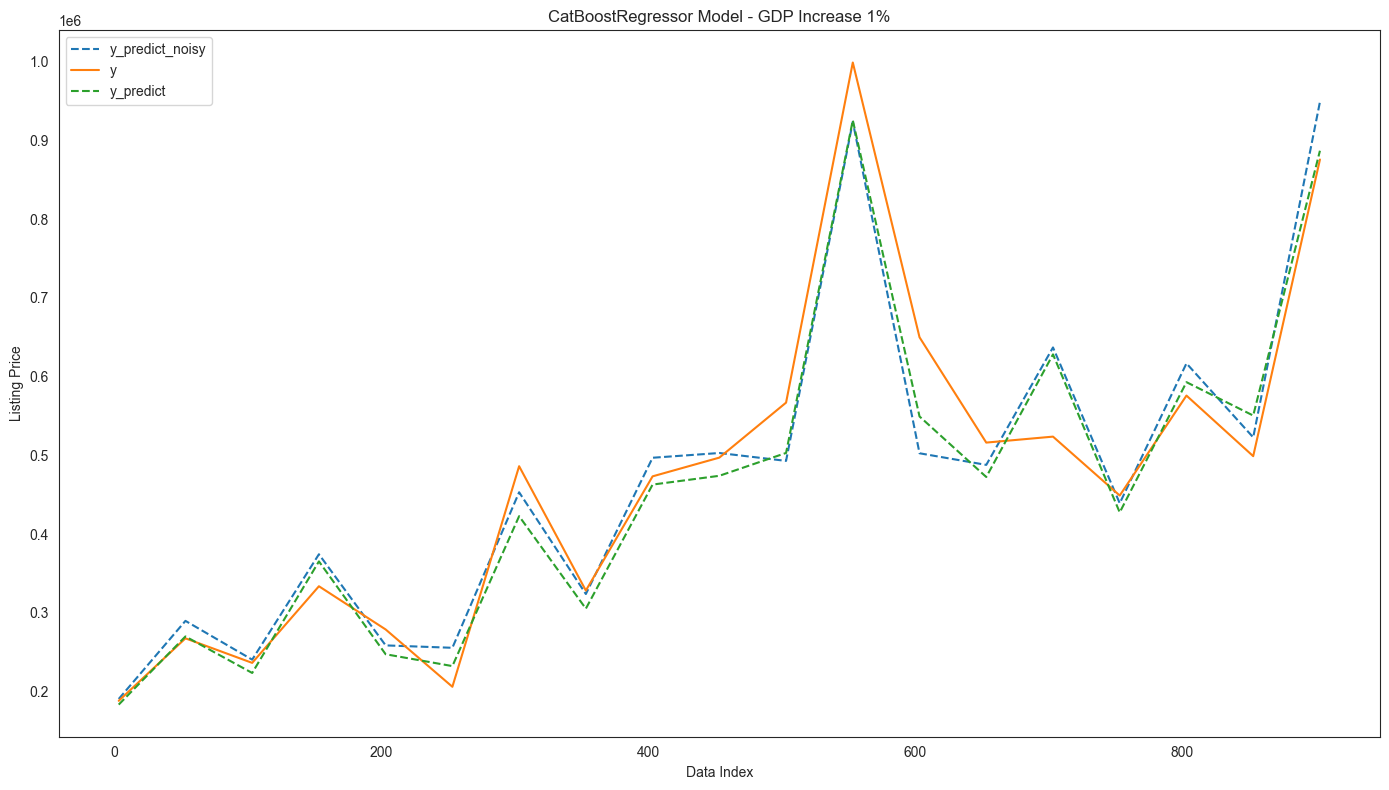

双体-CatBoostRegressor Model - GDP Increase 1%.svg
平均价格变化: 12350.798072363192
平均价格变化率: 2.6897615495518767
----------catBoost----------
X['GDP'].mean() 586.8428100987925


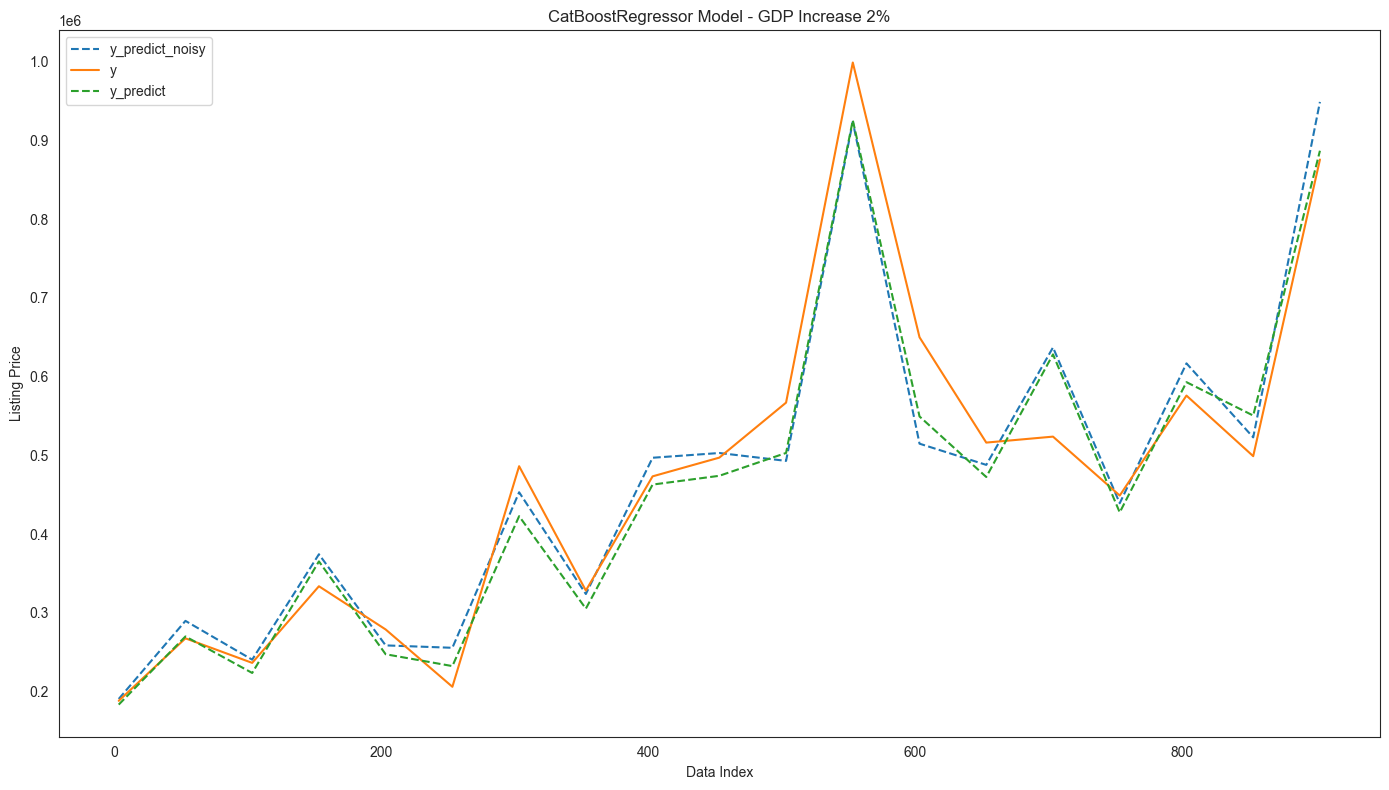

双体-CatBoostRegressor Model - GDP Increase 2%.svg
平均价格变化: 12991.883309471654
平均价格变化率: 2.8293773388034413
----------catBoost----------
X['GDP'].mean() 586.8428100987925


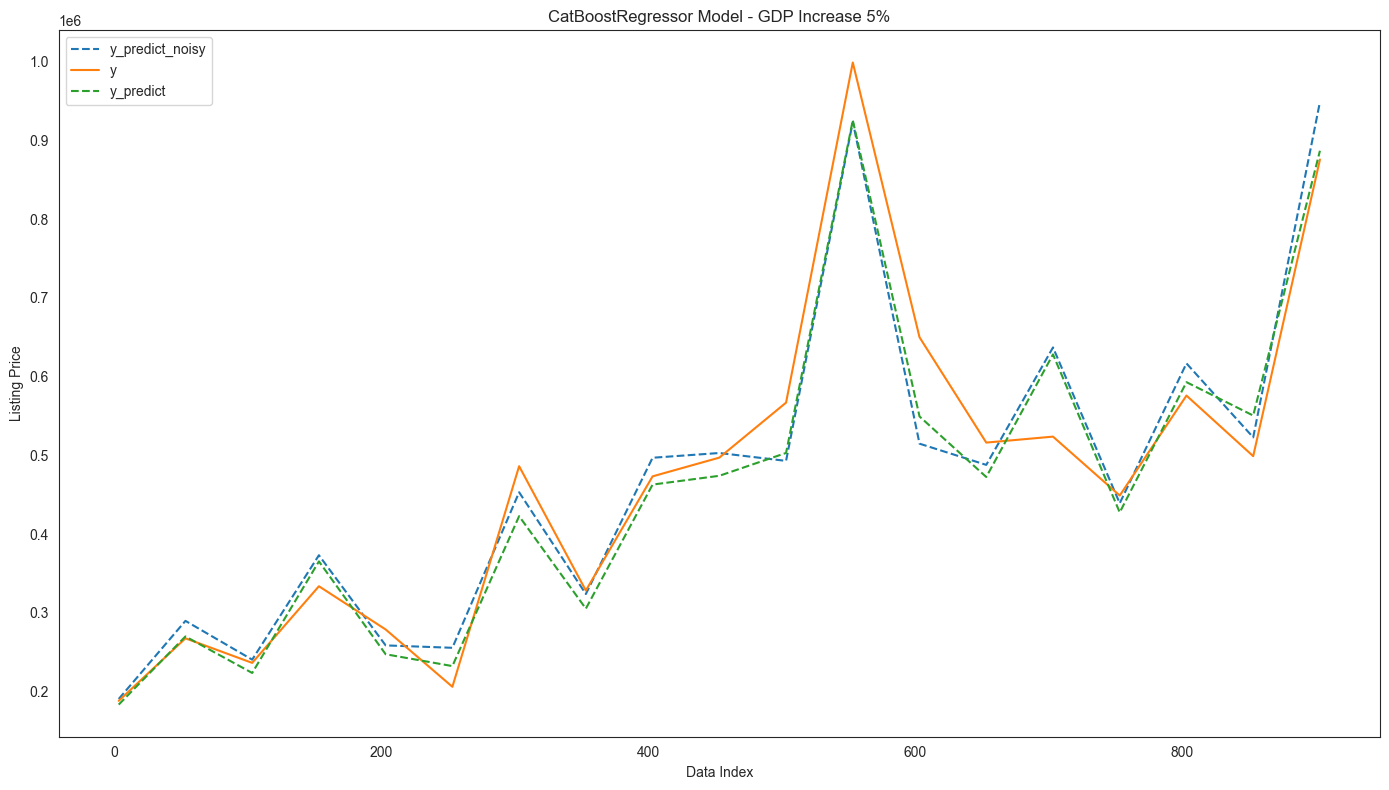

双体-CatBoostRegressor Model - GDP Increase 5%.svg
平均价格变化: 12926.781550586573
平均价格变化率: 2.8151994527404254
----------catBoost----------
X['GDP'].mean() 586.8428100987925


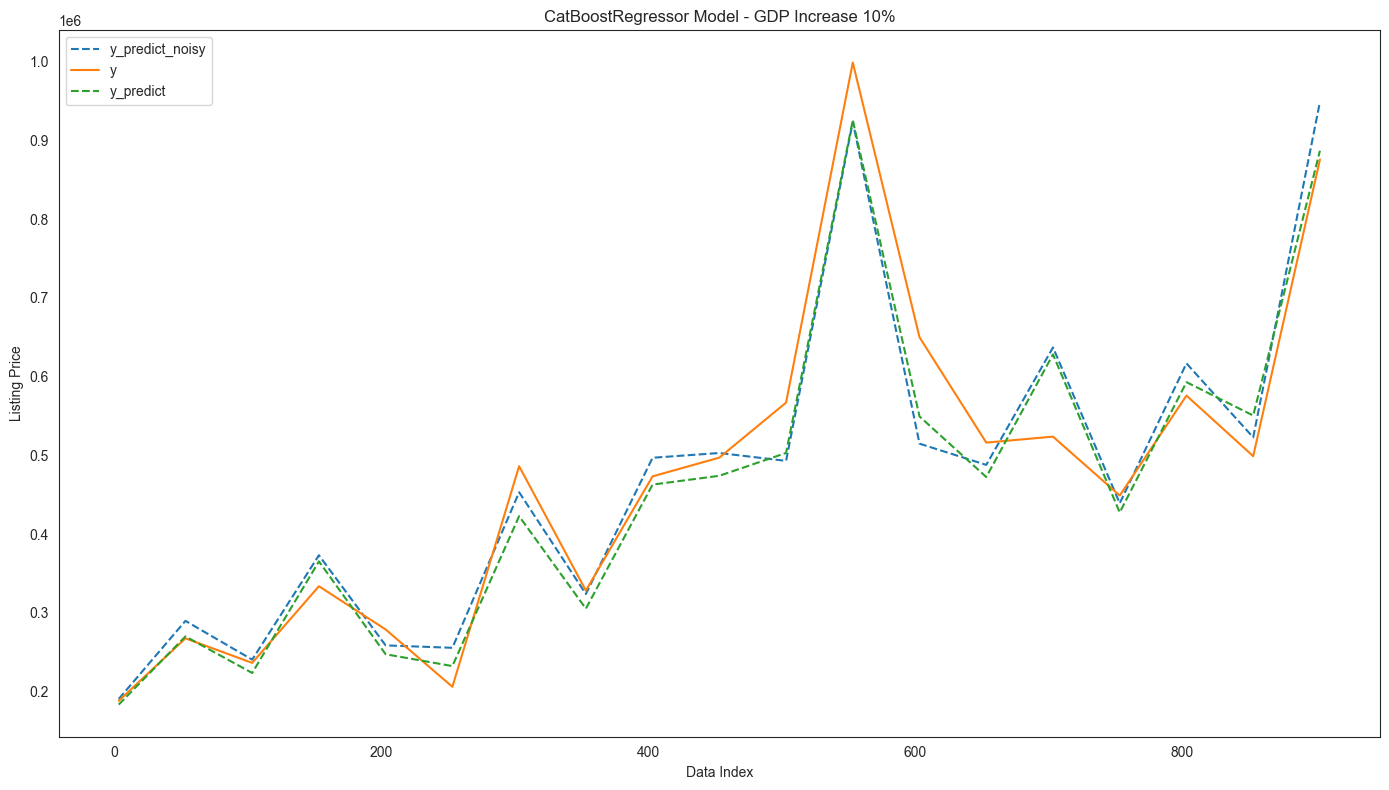

双体-CatBoostRegressor Model - GDP Increase 10%.svg
平均价格变化: 12926.781550586573
平均价格变化率: 2.8151994527404254


In [234]:

additionFileName = '双体'


def testNoisy(model, noiseRatio=None):
    modelName = type(model).__name__
    X, y = getxy()

    # 生成一个随机扰动，使用正态分布（高斯分布）生成
    delta = 0.75
    loc = X['GDP'].mean() * delta
    print("X['GDP'].mean()", loc)
    '''
    我们使用numpy.random.normal()函数生成一个具有高斯分布的随机扰动，并将其添加到原始一维向量中，生成一个包含随机扰动的新一维向量。
    loc：指定均值（也就是分布的中心），指定为GDP的平均值*0.75。
    scale：指定标准差（也就是分布的宽度），指定为1。
    '''
    noise = np.random.normal(loc, 1, len(X['GDP']))
    if noiseRatio is not None:
        noise = X['GDP'] * noiseRatio

    # # 随机扰动图
    # plt.figure(figsize=(16, 8))
    # plt.plot(np.asarray(range(len(noise))), noise)
    # plt.title('noise')
    # plt.tight_layout()
    # plt.legend()
    # plt.show()

    # 将随机扰动添加到一维向量中
    x_noisy = X.copy()
    x_noisy['GDP'] = X['GDP'] + noise

    # 使用模型进行预测
    y_pred_noisy = model.predict(x_noisy)
    y_pred = model.predict(X)

    # 减少数据点的数量
    x_sampled = np.arange(3, len(X['年份']), 50).astype('int64')
    y_pred_noisy = y_pred_noisy[x_sampled]
    y_pred = y_pred[x_sampled]
    y = y[x_sampled]

    # 还原价格
    y_pred_noisy = np.exp(y_pred_noisy)
    y_pred = np.exp(y_pred)
    y = np.exp(y)

    '''
    CatBoost加上随机扰动
    '''
    title = f'{modelName} Model - GDP Increase {int((noiseRatio - 1) * 100)}%'
    plt.figure(figsize=(14, 8))
    plt.plot(x_sampled, y_pred_noisy, label='y_predict_noisy', linestyle='--')
    plt.plot(x_sampled, y, label='y')
    plt.plot(x_sampled, y_pred, label='y_predict', linestyle='--')
    plt.xlabel('Data Index')
    plt.ylabel('Listing Price')
    plt.title(title)
    plt.tight_layout()
    plt.legend()
    # plt.savefig(f'{type(model).__name__}原始y-预测y-加扰动后预测y.svg')
    plt.savefig(f'{additionFileName}-{title}.svg')
    plt.show()

    y_delta = y_pred_noisy.mean() - y_pred.mean()
    print(f'{additionFileName}-{title}.svg')
    print(f'平均价格变化: {y_delta}')
    print(f'平均价格变化率: {y_delta / y_pred.mean() * 100}')


noiseRatioList = [1.01, 1.02, 1.05, 1.1]
for noiseRatio in noiseRatioList:
    # 加载模型数据
    with open('Ridge.pkl', 'rb') as f:
        ridge = pickle.load(f)
        print(f'----------ridge----------')
        testNoisy(ridge, noiseRatio)

for noiseRatio in noiseRatioList:
    # 加载模型数据
    with open('CatBoostRegressor.pkl', 'rb') as f:
        catBoost = pickle.load(f)
        print(f'----------catBoost----------')
        testNoisy(catBoost, noiseRatio)
